In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import pyreadr as rr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

## Uploading the database

In [2]:
rdata_read = rr.read_r(r"../../data/wage2015_subsample_inference.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]


data.shape

(5150, 20)

## Estimating the basic model: lwage and sex

In [3]:
formula_1 = 'lwage ~ sex'
formula_1

'lwage ~ sex'

In [4]:
# Regression

basic_model = smf.ols(formula_1, data = data).fit()
basic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.752
Date:                Fri, 08 Apr 2022   Prob (F-statistic):             0.0165
Time:                        23:16:47   Log-Likelihood:                -4412.7
No. Observations:                5150   AIC:                             8829.
Df Residuals:                    5148   BIC:                             8843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9878      0.011    280.316      0.000       2.967       3.009
sex           -0.0383      0.016     -2.398      0.017      -0.070      -0.007
==============================================================================
Omnibus:                      236.523   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.245
Skew:                           0.376   Prob(JB):                     6.09e-89
Kurtosis:                       4.153   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Estimating the 'controlled' model: lwage, sex and covariants

In [6]:
formula_2 = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
formula_2

'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

In [7]:
#Applying OLS

control_model = smf.ols(formula = formula_2, data = data).fit()
control_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          2.69e-305
Time:                        23:20:08   Log-Likelihood:                -3301.9
No. Observations:                5150   AIC:                             7096.
Df Residuals:                    4904   BIC:                             8706.
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2797      0.284     11.540      0.000       2.723       3.837
occ2[T.10]          0.0210      0.156      0.134      0.893      -0.286       0.328
occ2[T.11]         -0.6424      0.309     -2.078      0.038      -1.248      -0.036
occ2[T.12]         -0.0675      0.252     -0.268      0.789      -0.562       0.427
occ2[T.13]         -0.2330      0.232     -1.006      0.314      -0.687       0.221
occ2[T.14]          0.2562      0.323      0.794      0.427      -0.376       0.889
occ2[T.15]         -0.1939      0.260     -0.747      0.455      -0.703       0.315
occ2[T.16]         -0.0551      0.147     -0.375      0.708      -0.343       0.233
occ2[T.17]         -0.4156      0.136     -3.053      0.002      -0.682      -0.149
occ2[T.18]         -0.4822      1.044     -0.462      0.644      -2.530       1.565
occ2[T.19]         -0.2579      0.333     -0.776      0.438      -0.910       0.394
occ2[T.2]           0.1613      0.130      1.244      0.214      -0.093       0.416
occ2[T.20]         -0.3010      0.234     -1.286      0.199      -0.760       0.158
occ2[T.21]         -0.4272      0.221     -1.936      0.053      -0.860       0.005
occ2[T.22]         -0.8695      0.298     -2.922      0.003      -1.453      -0.286
occ2[T.3]           0.2102      0.169      1.246      0.213      -0.121       0.541
occ2[T.4]           0.0709      0.184      0.386      0.700      -0.289       0.431
occ2[T.5]          -0.3960      0.189     -2.100      0.036      -0.766      -0.026
occ2[T.6]          -0.2311      0.187     -1.236      0.217      -0.598       0.135
occ2[T.7]           0.3147      0.194      1.621      0.105      -0.066       0.695
occ2[T.8]          -0.1875      0.169     -1.108      0.268      -0.519       0.144
occ2[T.9]          -0.3390      0.167     -2.027      0.043      -0.667      -0.011
ind2[T.11]         -0.4047      0.314     -1.288      0.198      -1.021       0.211
ind2[T.12]         -0.1570      0.279     -0.562      0.574      -0.705       0.391
ind2[T.13]         -0.4377      0.362     -1.210      0.226      -1.147       0.271
ind2[T.14]         -0.0054      0.270     -0.020      0.984      -0.535       0.524
ind2[T.15]          0.2004      0.501      0.400      0.689      -0.781       1.182
ind2[T.16]          0.0102      0.300      0.034      0.973      -0.577       0.598
ind2[T.17]         -0.2396      0.285     -0.841      0.401      -0.798       0.319
ind2[T.18]         -0.1808      0.278     -0.649      0.516      -0.727       0.365
ind2[T.19]         -0.3007      0.327     -0.921      0.357      -0.941       0.339
ind2[T.2]           0.5806      0.481      1.207      0.227      -0.362       1.523
ind2[T.20]         -0.3293      0.313     -1.052      0.293      -0.943       0.284
ind2[T.21]         -0.1781      0.304     -0.586      0.558

* As seen in the previous output, the coefficient of the sex variable was reduced (from -0.0383 to -0.0696) due to a more controlled effect due to the presence of the other covariates.

## Estimating through the Partilliang out process

* It contains three steps

In [8]:
# 1 : Rescue the residues of the regression between the endogenous and all covariates that are not 'sex'

flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' # the equation is posed

t_Y = smf.ols( formula = flex_y , data = data ).fit().resid # rescue the errors
t_Y

rownames
10      -0.567731
12       0.404602
15      -0.481643
18      -1.074180
19       0.097208
           ...   
32620   -0.262079
32624    0.582018
32626   -0.001855
32631    0.387129
32643   -0.772313
Length: 5150, dtype: float64

In [9]:
# 2 : Rescue the residues of the regression between the variable of interest ('sex') and all covariates that are not 'sex'

flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' # equation

t_D = smf.ols( formula = flex_d , data = data ).fit().resid # errors
t_D

rownames
10       0.105742
12      -0.569249
15      -0.045516
18       0.400720
19       0.312384
           ...   
32620   -0.409648
32624    0.547954
32626    0.035117
32631   -0.309997
32643   -0.471559
Length: 5150, dtype: float64

In [10]:
# Both results are placed in a new DataFrame and then treated as variables

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )

data_res

t_Y       t_D
0    -0.567731  0.105742
1     0.404602 -0.569249
2    -0.481643 -0.045516
3    -1.074180  0.400720
4     0.097208  0.312384
...        ...       ...
5145 -0.262079 -0.409648
5146  0.582018  0.547954
5147 -0.001855  0.035117
5148  0.387129 -0.309997
5149 -0.772313 -0.471559

[5150 rows x 2 columns]

In [11]:
# 3 : The last regression is applied which is between the residues of the first step against the residues of the second step

partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit() 

partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D'] # rescuing the interest coefficient

partial_est

-0.06955320329684592

* As you can see, it is the same result as the previous model

# GRAPHICS

## Confidence interval graph for the basic model

In [5]:
# Estimated coefficients, confidence intervals, and variable name are needed to construct the graph

basic_model.params
basic_model.conf_int()

0         1
Intercept  2.966934  3.008725
sex       -0.069688 -0.007002

In [12]:
# Calculating the bar lengths for the confidence intervals, which are the series of errors

err_series_1 = basic_model.params - basic_model.conf_int()[0]
err_series_1

Intercept    0.020896
sex          0.031343
dtype: float64

In [13]:
# Building the DataFrame without taking into account interception

coef_df_1 = pd.DataFrame({'coef_1': basic_model.params[1:],
                        'err_1': err_series_1.values[1:],
                        'varname_1': err_series_1.index.values[1:]
                       })
coef_df_1

coef_1     err_1 varname_1
sex -0.038345  0.031343       sex

C:\Users\a2018\AppData\Local\Temp/ipykernel_7312/3813588587.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df_1.shape[0]),


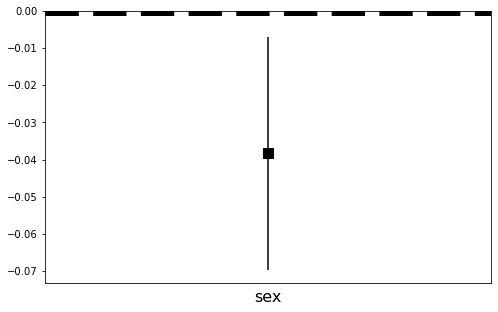

In [14]:
# The graphic

fig, ax = plt.subplots(figsize=(8, 5))
coef_df_1.plot(x='varname_1', y='coef_1', kind='bar', 
             ax=ax, color='none', 
             yerr='err_1', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df_1.shape[0]), 
           marker='s', s=120, 
           y=coef_df_1['coef_1'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=9)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['sex'], 
                       rotation=0, fontsize=16)

## Confidence interval graph for the 'controlled' model

In [15]:
# The same process as the previous graph

control_model.params
control_model.conf_int()

0         1
Intercept   2.722526  3.836828
occ2[T.10] -0.285852  0.327761
occ2[T.11] -1.248372 -0.036463
occ2[T.12] -0.561605  0.426651
occ2[T.13] -0.686896  0.220940
...              ...       ...
exp4:scl   -0.027012  0.069164
exp4:clg   -0.036736  0.052475
exp4:mw    -0.024868  0.037356
exp4:so    -0.026402  0.027031
exp4:we    -0.029521  0.033058

[246 rows x 2 columns]

In [16]:
# Estimating model errors

err_series_2 = control_model.params- control_model.conf_int()[0]
err_series_2

Intercept     0.557151
occ2[T.10]    0.306807
occ2[T.11]    0.605955
occ2[T.12]    0.494128
occ2[T.13]    0.453918
                ...   
exp4:scl      0.048088
exp4:clg      0.044606
exp4:mw       0.031112
exp4:so       0.026716
exp4:we       0.031289
Length: 246, dtype: float64

In [ ]:
# Haciendo un Dataframe de los datos obviando el intercepto

coef_df_2_beta = pd.DataFrame({'coefcm': control_model.params.values[1:],
                        'errcm': err_series_2.values[1:],
                        'varname': err_series_2.index.values[1:]
                       }) # creo que acá es especificar la fila que se quiere
coef_df_2_beta

In [ ]:
# El gráfico de intervalos de confianza para el modelo 'controlado'

fig, ax = plt.subplots(figsize=(8, 5))
coef_df_2_beta.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
                       rotation=0, fontsize=16)

# me falta graficar para un solo beta en este caso porque se grafica todo :/

## Confidence interval graph for the 'Patilliang-out' model

In [17]:
partial_fit.params
partial_fit.conf_int()

0         1
Intercept -0.012553  0.012553
t_D       -0.098671 -0.040435

In [18]:
# The length of the confidence interval

err_series_3 = partial_fit.params - partial_fit.conf_int()[0]
err_series_3

Intercept    0.012553
t_D          0.029118
dtype: float64

In [19]:
# DataFrame

coef_df_3 = pd.DataFrame({'coef_po': partial_fit.params[1:],
                        'err_3': err_series_3.values[1:],
                        'varname_3': err_series_3.index.values[1:]
                       })
coef_df_3

coef_po     err_3 varname_3
t_D -0.069553  0.029118       t_D

C:\Users\a2018\AppData\Local\Temp/ipykernel_7312/944776340.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df_1.shape[0]),


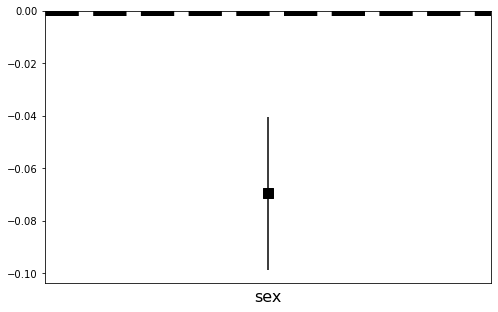

In [20]:
# The graphic

fig, ax = plt.subplots(figsize=(8, 5))
coef_df_3.plot(x='varname_3', y='coef_po', kind='bar', 
             ax=ax, color='none', 
             yerr='err_3', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df_1.shape[0]), 
           marker='s', s=120, 
           y=coef_df_3['coef_po'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=9)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['sex'], 
                       rotation=0, fontsize=16)